In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("recs2009_public.csv")


/var/folders/_v/0f3ptrd11s16y8r58r042_pr0000gn/T/ipykernel_78291/3569092814.py:12: DtypeWarning: Columns (717,718) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("recs2009_public.csv")


In [5]:
# Preprocess the data
# Select relevant features and target variable
features = df[['YEARMADE', 'TOTROOMS', 'KWH', 'HDD65']]
target = df['TOTALBTU']

# Handle missing values
features = features.fillna(features.mean())
target = target.fillna(target.mean())

# Convert regression problem to classification problem
threshold = target.mean()  # Define threshold for classification

# Create binary labels based on the threshold
labels = (target >= threshold).astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Model 1: Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions)
lr_auc = roc_auc_score(y_test, lr_predictions)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression F1 Score:", lr_f1)
print("Logistic Regression AUC:", lr_auc)


Logistic Regression Accuracy: 0.7699627637567232
Logistic Regression F1 Score: 0.7055084745762712
Logistic Regression AUC: 0.7551211080994581


In [6]:
# Model 2: Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
rf_auc = roc_auc_score(y_test, rf_predictions)
print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Random Forest Classifier F1 Score:", rf_f1)
print("Random Forest Classifier AUC:", rf_auc)


Random Forest Classifier Accuracy: 0.7794786925941249
Random Forest Classifier F1 Score: 0.7276443536024527
Random Forest Classifier AUC: 0.7703237007644311


In [7]:
# Model 3: Support Vector Classifier
svc_model = SVC(probability=True)
svc_model.fit(X_train, y_train)
svc_predictions = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predictions)
svc_f1 = f1_score(y_test, svc_predictions)
svc_auc = roc_auc_score(y_test, svc_predictions)
print("Support Vector Classifier Accuracy:", svc_accuracy)
print("Support Vector Classifier F1 Score:", svc_f1)
print("Support Vector Classifier AUC:", svc_auc)


Support Vector Classifier Accuracy: 0.7157633429871741
Support Vector Classifier F1 Score: 0.6434872859366892
Support Vector Classifier AUC: 0.7021033893840651


In [8]:
# Model 4: Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions)
dt_auc = roc_auc_score(y_test, dt_predictions)
print("Decision Tree Classifier Accuracy:", dt_accuracy)
print("Decision Tree Classifier F1 Score:", dt_f1)
print("Decision Tree Classifier AUC:", dt_auc)


Decision Tree Classifier Accuracy: 0.7165908150599917
Decision Tree Classifier F1 Score: 0.6590343454454954
Decision Tree Classifier AUC: 0.7093313564050494


In [9]:
# Model 5: Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
gb_f1 = f1_score(y_test, gb_predictions)
gb_auc = roc_auc_score(y_test, gb_predictions)
print("Gradient Boosting Classifier Accuracy:", gb_accuracy)
print("Gradient Boosting Classifier F1 Score:", gb_f1)
print("Gradient Boosting Classifier AUC:", gb_auc)


Gradient Boosting Classifier Accuracy: 0.7927182457592056
Gradient Boosting Classifier F1 Score: 0.7450381679389312
Gradient Boosting Classifier AUC: 0.7846366048947384


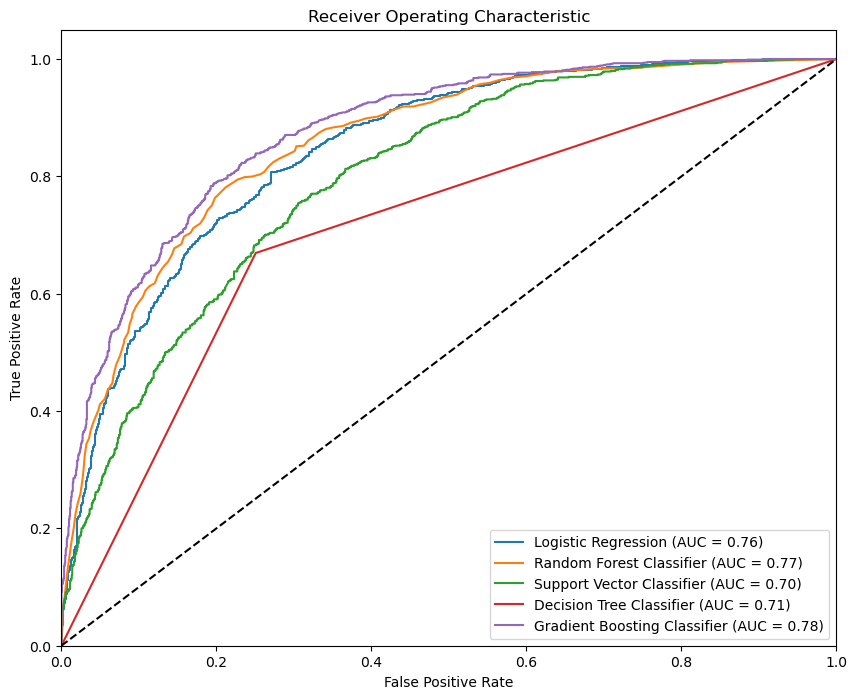

In [10]:
# Plotting the ROC curve
lr_probs = lr_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]
svc_probs = svc_model.predict_proba(X_test)[:, 1]
dt_probs = dt_model.predict_proba(X_test)[:, 1]
gb_probs = gb_model.predict_proba(X_test)[:, 1]

plt.figure(figsize=(10, 8))
fpr, tpr, _ = roc_curve(y_test, lr_probs)
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(lr_auc))

fpr, tpr, _ = roc_curve(y_test, rf_probs)
plt.plot(fpr, tpr, label='Random Forest Classifier (AUC = {:.2f})'.format(rf_auc))

fpr, tpr, _ = roc_curve(y_test, svc_probs)
plt.plot(fpr, tpr, label='Support Vector Classifier (AUC = {:.2f})'.format(svc_auc))

fpr, tpr, _ = roc_curve(y_test, dt_probs)
plt.plot(fpr, tpr, label='Decision Tree Classifier (AUC = {:.2f})'.format(dt_auc))

fpr, tpr, _ = roc_curve(y_test, gb_probs)
plt.plot(fpr, tpr, label='Gradient Boosting Classifier (AUC = {:.2f})'.format(gb_auc))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

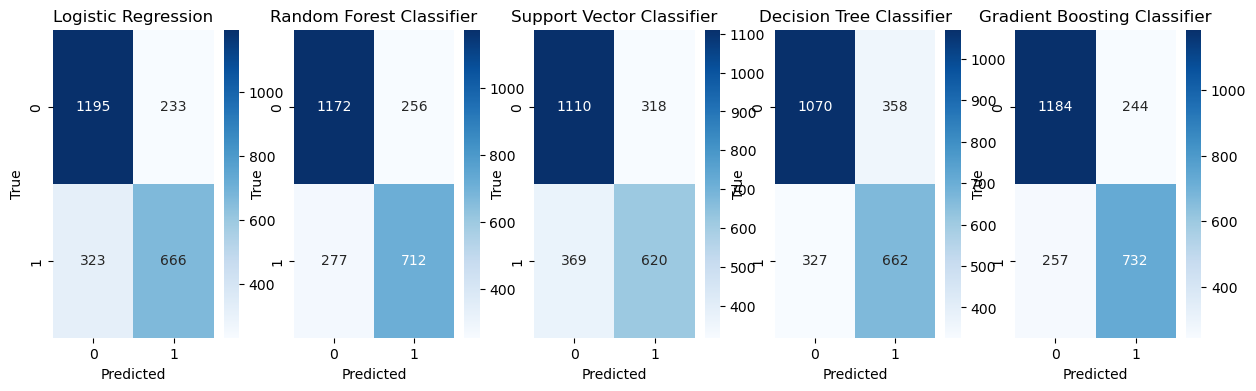

In [13]:
# Plotting the confusion matrix
lr_cm = confusion_matrix(y_test, lr_predictions)
rf_cm = confusion_matrix(y_test, rf_predictions)
svc_cm = confusion_matrix(y_test, svc_predictions)
dt_cm = confusion_matrix(y_test, dt_predictions)
gb_cm = confusion_matrix(y_test, gb_predictions)

plt.figure(figsize=(15, 4))

plt.subplot(1, 5, 1)
sns.heatmap(lr_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 5, 2)
sns.heatmap(rf_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 5, 3)
sns.heatmap(svc_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Support Vector Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 5, 4)
sns.heatmap(dt_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 5, 5)
sns.heatmap(gb_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Gradient Boosting Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

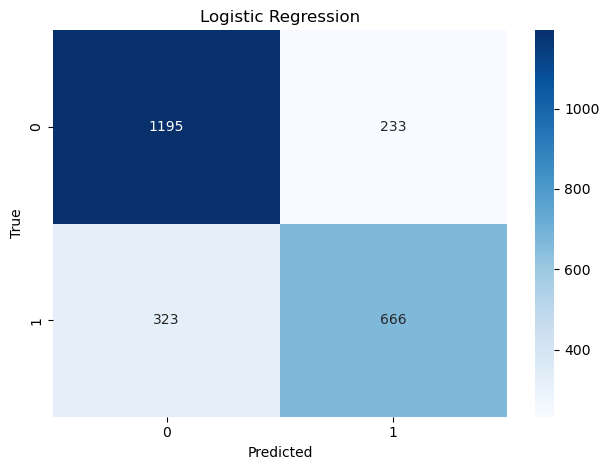

In [23]:
plt.subplot(1, 1, 1)
sns.heatmap(lr_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

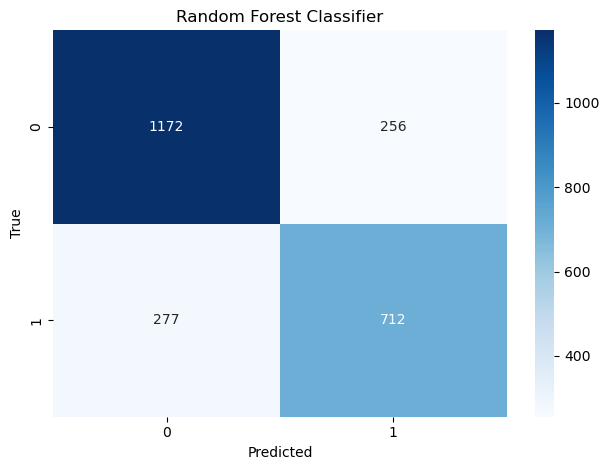

In [19]:
plt.subplot(1, 1, 1)
sns.heatmap(rf_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

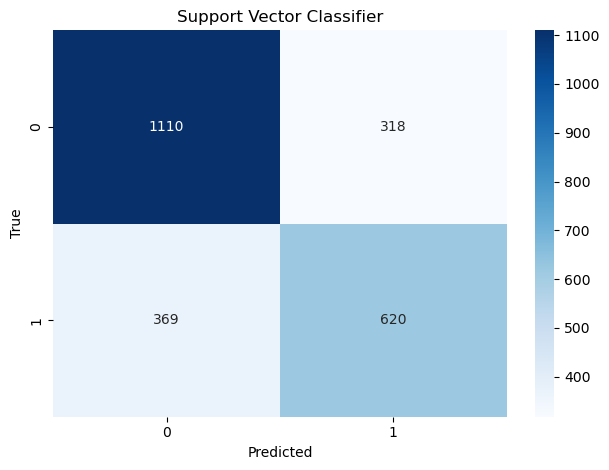

In [18]:
plt.subplot(1, 1, 1)
sns.heatmap(svc_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Support Vector Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

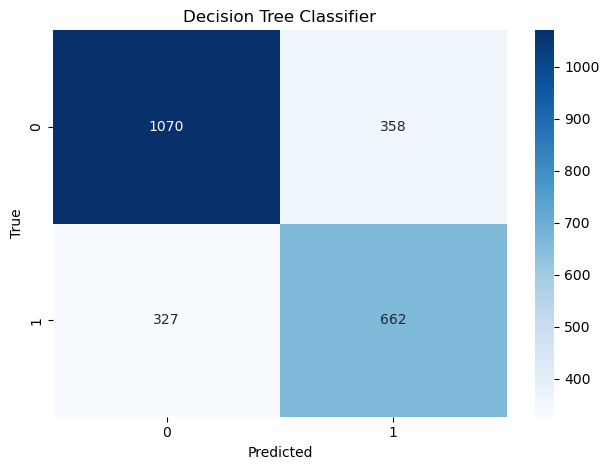

In [21]:
plt.subplot(1, 1, 1)
sns.heatmap(dt_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

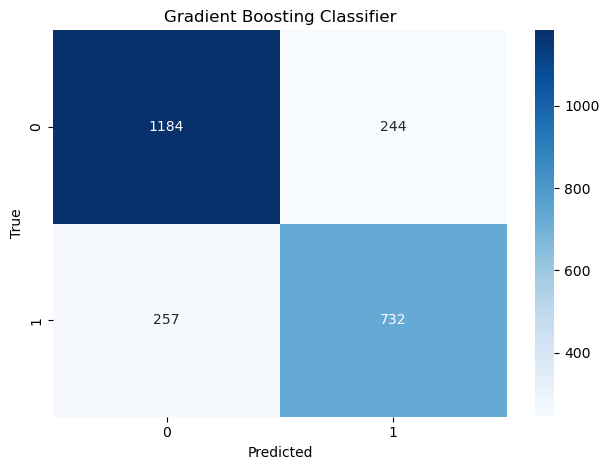

In [20]:
plt.subplot(1, 1, 1)
sns.heatmap(gb_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Gradient Boosting Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()